In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 20,10 # Setting and fixing bigger figure size

In [2]:
df = pd.read_csv('c:/Downloads/gapminder.csv',sep=",")
df = df.apply(lambda x: x.str.strip())
df = df.set_index('country')
for col in df.columns: df[col] = pd.to_numeric(df[col])

In [37]:
for col in ['incomeperperson','co2emissions','hivrate','oilperperson']: df[col+'_log'] = np.log(df[col])

In [9]:
df.describe()

,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,incomeperperson_log
count,190.000000,187.000000,164.000000,173.000000,2.000000e+02,178.000000,147.000000,192.000000,191.000000,63.000000,161.000000,136.000000,191.000000,178.000000,203.000000,190.000000
mean,8740.966076,6.689412,1.444016,37.402890,5.033262e+09,47.549438,1.935442,35.632716,69.753524,1.484085,3.689441,1173.178995,9.640839,58.635955,56.769360,7.951597
std,14262.809083,4.899617,1.709008,22.697901,2.573812e+10,14.625743,4.376727,27.780285,9.708621,1.825090,6.314899,1681.440173,6.300178,10.519454,23.844933,1.608569
min,103.775857,0.030000,0.000000,3.900000,1.320000e+05,11.300000,0.060000,0.210066,47.794000,0.032281,-10.000000,0.000000,0.201449,32.000000,10.400000,4.642233
25%,748.245151,2.625000,0.480907,20.600000,3.484617e+07,38.725000,0.100000,9.999604,64.447000,0.532541,-2.000000,203.652109,4.988449,51.225000,36.830000,6.617688
50%,2553.496056,5.920000,0.930638,30.000000,1.859018e+08,47.549999,0.400000,31.810121,73.131000,1.032470,6.000000,597.136436,8.262893,58.699999,57.940000,7.845218
75%,9379.891165,9.925000,1.611383,50.300000,1.846084e+09,55.875000,1.300000,56.416046,76.593000,1.622737,9.000000,1491.145249,12.328551,64.975000,74.210000,9.146288
max,105147.437697,23.010000,10.638521,101.100000,3.342209e+11,83.300003,25.900000,95.638113,83.394000,12.228645,10.000000,11154.755033,35.752872,83.199997,100.000000,11.563119


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213 entries, Afghanistan to Zimbabwe
Data columns (total 18 columns):
incomeperperson         190 non-null float64
alcconsumption          187 non-null float64
armedforcesrate         164 non-null float64
breastcancerper100th    173 non-null float64
co2emissions            200 non-null float64
femaleemployrate        178 non-null float64
hivrate                 147 non-null float64
internetuserate         192 non-null float64
lifeexpectancy          191 non-null float64
oilperperson            63 non-null float64
polityscore             161 non-null float64
relectricperperson      136 non-null float64
suicideper100th         191 non-null float64
employrate              178 non-null float64
urbanrate               203 non-null float64
incomeperperson_log     190 non-null float64
co2emissions_log        200 non-null float64
hivrate_log             147 non-null float64
dtypes: float64(18)
memory usage: 31.6+ KB


In [11]:
(df.count()/df.shape[0]).sort_values(ascending=False) # fill-ratio

urbanrate               0.953052
co2emissions            0.938967
internetuserate         0.901408
suicideper100th         0.896714
lifeexpectancy          0.896714
incomeperperson_log     0.892019
incomeperperson         0.892019
alcconsumption          0.877934
employrate              0.835681
femaleemployrate        0.835681
breastcancerper100th    0.812207
armedforcesrate         0.769953
polityscore             0.755869
hivrate                 0.690141
relectricperperson      0.638498
oilperperson            0.295775
dtype: float64

In [15]:
df.corr()

,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,incomeperperson_log
incomeperperson,1.000000,0.295392,0.015255,0.731399,0.270562,0.028358,-0.198452,0.750939,0.601516,0.541893,0.281223,0.651637,0.006555,-0.011826,0.490094,0.760606
alcconsumption,0.295392,1.000000,-0.196560,0.493298,0.113433,0.169747,-0.062414,0.534477,0.312994,-0.245880,0.430950,0.035334,0.354635,-0.133838,0.274336,0.395904
armedforcesrate,0.015255,-0.196560,1.000000,-0.042610,-0.057985,-0.332640,-0.168651,0.037762,0.186818,0.521558,-0.341664,0.034922,-0.113688,-0.274861,0.212006,0.108220
breastcancerper100th,0.731399,0.493298,-0.042610,1.000000,0.284828,-0.075259,-0.271809,0.788418,0.637302,0.136904,0.513933,0.407097,0.038448,-0.244571,0.570433,0.728160
co2emissions,0.270562,0.113433,-0.057985,0.284828,1.000000,0.052951,-0.063702,0.192992,0.150361,0.044442,0.114967,0.188822,0.058815,0.016853,0.135549,0.212406
femaleemployrate,0.028358,0.169747,-0.332640,-0.075259,0.052951,1.000000,0.092117,-0.089481,-0.272731,0.016109,0.054059,-0.020672,0.150460,0.857500,-0.302980,-0.224403
hivrate,-0.198452,-0.062414,-0.168651,-0.271809,-0.063702,0.092117,1.000000,-0.343480,-0.566026,-0.074064,-0.081739,-0.199108,0.023307,-0.011453,-0.268647,-0.226158
internetuserate,0.750939,0.534477,0.037762,0.788418,0.192992,-0.089481,-0.343480,1.000000,0.763920,0.371545,0.364384,0.586461,0.068719,-0.194309,0.613946,0.859417
lifeexpectancy,0.601516,0.312994,0.186818,0.637302,0.150361,-0.272731,-0.566026,0.763920,1.000000,0.362674,0.296285,0.442876,-0.084724,-0.325784,0.618707,0.802840
oilperperson,0.541893,-0.245880,0.521558,0.136904,0.044442,0.016109,-0.074064,0.371545,0.362674,1.000000,-0.267053,0.524937,-0.163560,0.272004,0.532176,0.534939


In [100]:
df.sort_values("incomeperperson", ascending=False)

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
127,Monaco,105147.437697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.151073,NaN,100.00
109,Liechtenstein,81647.100031,NaN,NaN,NaN,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,14.32
20,Bermuda,62682.147006,NaN,NaN,NaN,2.033167e+07,NaN,NaN,84.654514,NaN,NaN,NaN,NaN,NaN,NaN,100.00
111,Luxembourg,52301.587179,12.84,0.731336,82.5,5.920127e+08,45.900002,0.30,90.079527,79.963,NaN,NaN,1566.106139,12.405918,53.500000,82.44
144,Norway,39972.352768,8.35,0.720528,74.8,1.962704e+09,60.900002,0.10,93.277508,81.097,2.191226,10,7432.130852,10.823000,65.000000,77.48
94,Japan,39309.478859,7.79,0.361858,32.7,4.609221e+10,46.200001,0.06,77.638535,83.394,1.593223,10,2257.572233,18.946930,57.299999,66.48
185,Switzerland,37662.751250,11.41,0.524220,81.7,2.406741e+09,57.000000,0.40,82.166660,82.338,1.487412,10,2361.033336,13.239810,64.300003,73.48
203,United States,37491.179523,9.70,0.972378,101.1,3.342209e+11,56.000000,0.60,74.247572,78.531,2.738544,10,4542.848695,9.927033,62.299999,81.70
83,"Hong Kong, China",35536.072471,NaN,NaN,NaN,1.026813e+09,51.599998,NaN,71.849124,82.759,2.282655,NaN,1468.640784,NaN,59.000000,100.00
85,Iceland,33945.314422,7.38,0.066100,90.0,9.277033e+07,69.599998,0.30,95.638113,81.804,NaN,NaN,2826.044873,11.426181,73.599998,92.26


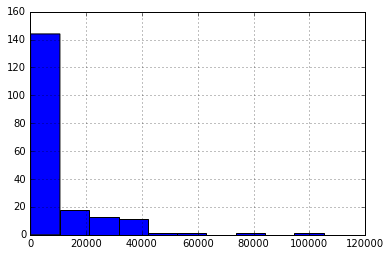

In [114]:
%matplotlib inline
df['incomeperperson'].hist()

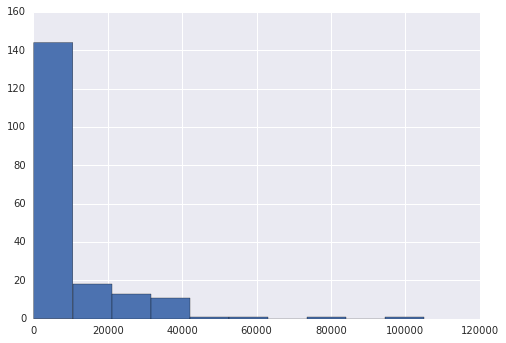

In [116]:
import seaborn as sns
df['incomeperperson'].hist()

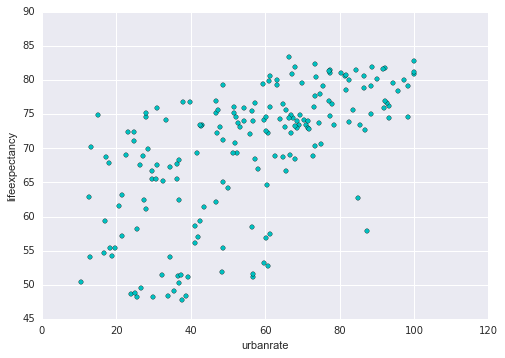

In [125]:
df.plot(kind='scatter', x='urbanrate', y='lifeexpectancy', c='c');

In [57]:
c = df.corr().abs().unstack()
correlations = c.sort_values(kind="quicksort",ascending=False)

In [58]:
df

,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,incomeperperson_log,co2emissions_log,hivrate_log
country,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,0.03,0.569653,26.8,7.594400e+07,25.600000,NaN,3.654122,48.673,NaN,0,NaN,6.684385,55.700001,24.04,NaN,18.145507,NaN
Albania,1914.996551,7.29,1.024736,57.4,2.237473e+08,42.099998,NaN,44.989947,76.918,NaN,9,636.341383,7.699330,51.400002,46.72,7.557471,19.226028,NaN
Algeria,2231.993335,0.69,2.306817,23.5,2.932109e+09,31.700001,0.10,12.500073,73.131,0.420095,2,590.509814,4.848770,50.500000,65.22,7.710650,21.798988,-2.302585
Andorra,21943.339898,10.17,NaN,NaN,NaN,NaN,NaN,81.000000,NaN,NaN,NaN,NaN,5.362179,NaN,88.92,9.996219,NaN,NaN
Angola,1381.004268,5.57,1.461329,23.1,2.483580e+08,69.400002,2.00,9.999954,51.093,NaN,-2,172.999227,14.554677,75.699997,56.70,7.230566,19.330382,0.693147
Antigua and Barbuda,11894.464075,8.17,NaN,NaN,1.622500e+07,NaN,NaN,80.645455,NaN,NaN,NaN,NaN,2.161843,NaN,30.46,9.383828,16.602064,NaN
Argentina,10749.419238,9.35,0.560987,73.9,5.872119e+09,45.900002,0.50,36.000335,75.901,0.635944,8,768.428300,7.765584,58.400002,92.00,9.282607,22.493481,-0.693147
Armenia,1326.741757,13.66,2.618438,51.6,5.121967e+07,34.200001,0.10,44.001025,74.241,NaN,5,603.763058,3.741588,40.099998,63.86,7.190481,17.751634,-2.302585
Aruba,NaN,NaN,NaN,NaN,3.587100e+07,NaN,NaN,41.800889,75.246,NaN,NaN,NaN,NaN,NaN,46.78,NaN,17.395440,NaN


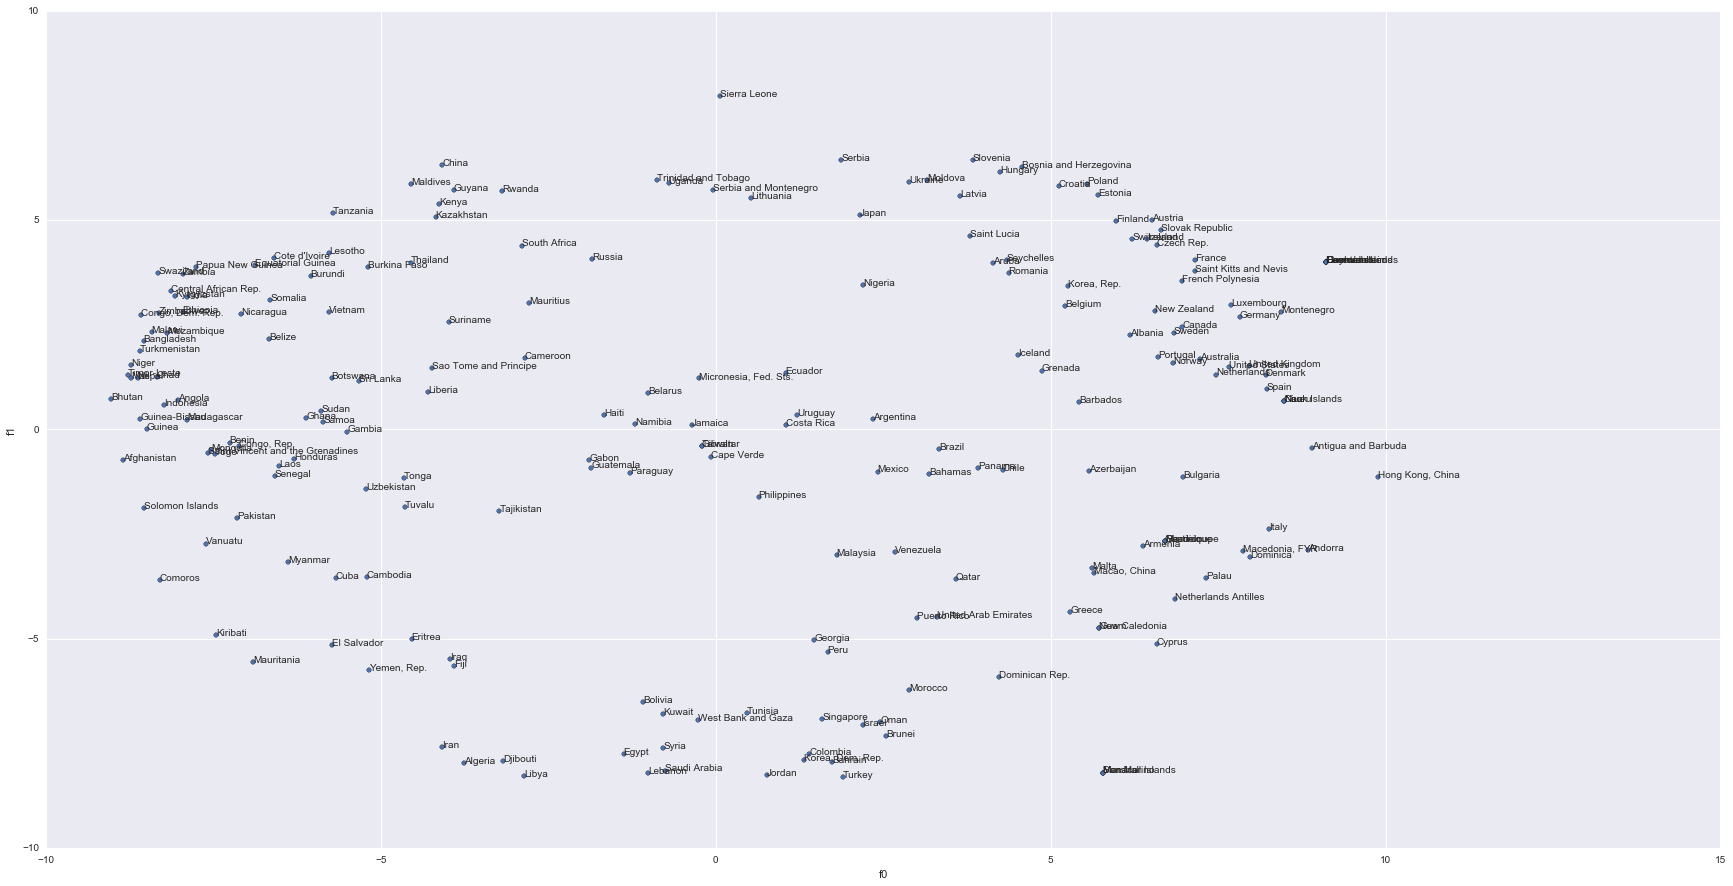

In [71]:
from sklearn.decomposition import PCA
df1 = df[['urbanrate','employrate','lifeexpectancy','internetuserate','alcconsumption','suicideper100th','armedforcesrate']]
c = (df1 / df1.mean()).T.corr().fillna(0)
pca = sklearn.decomposition.PCA(2)
factors = pca.fit_transform(c.values)
res = pd.DataFrame({'f0':factors.T[0],'f1':factors.T[1]})
res.index = c.columns

fig, ax = plt.subplots()
res.plot.scatter('f0','f1', ax=ax, figsize=(30,15))
for k, v in res.iterrows(): ax.annotate(k, v)

C:\Python\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


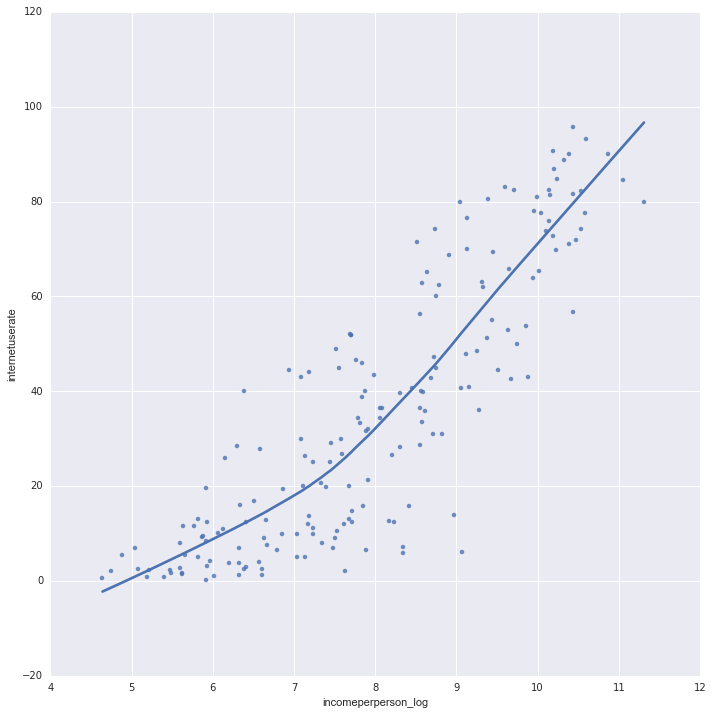

In [112]:
sns.lmplot(x="incomeperperson_log", y="internetuserate", data=df, lowess=True, size=10);


In [109]:
# mit magyaraz a legjobban az income
col_x="incomeperperson_log"
rsqs = [pd.ols(y=df[col], x=df[col_x]).r2 for col in df.columns]
pd.DataFrame(index=df.columns, data={'rsq' : rsqs}).sort_values('rsq',ascending=False)

,rsq
incomeperperson_log,1.000000
internetuserate,0.738598
lifeexpectancy,0.644552
incomeperperson,0.578521
breastcancerper100th,0.530217
urbanrate,0.505931
relectricperperson,0.410441
oilperperson,0.286159
co2emissions_log,0.200099
hivrate_log,0.182220
